In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [40]:
trajectory_ids = [1, 2]
subject_ids = [2, 3, 4]
vertical = ['Top', 'Middle','Bottom']
horizontal = ['Left', 'Center', 'Right']

In [41]:
def get_file_name(v, h, t_id, s_id):
    vertical = ['Top', 'Middle','Bottom']
    horizontal = ['Left', 'Center', 'Right']

    file_name = 'Position'
    file_name += vertical[v] + horizontal[h] 
    file_name += 'Trajectory' + str(t_id) 
    file_name += 'Subject' + str(s_id) + '.csv'
    return file_name

In [42]:
def load_trajs(file_names):
    trajs = []
    for f in file_names:
        try:
            trajs.append(pd.read_csv('./RightWristData/' + f).dropna().to_numpy())
        except FileNotFoundError:
            pass
    return trajs

In [43]:
def find_max(trajs, id):
    all_length = []
    for item in trajs:
        length = len(item[:, id])
        all_length.append(length)
    max_length = np.max(all_length)
    return max_length

In [44]:
def plot(col_id, title):
    fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    for v in range(3):
        for h in range(3):
            file_names = [get_file_name(v, h, t, s) for t, s in product(trajectory_ids, subject_ids)]
            trajs = load_trajs(file_names)
            max_length = find_max(trajs, col_id)
            newListOfArray = []
            
            for traj in trajs:
                new = np.array([])
                for i in range(len(traj[:, col_id])):
                    new = np.append(new, traj[i, col_id])
                newListOfArray.append(new)


            for i, item in enumerate(newListOfArray):              
                lastNum = item[-1] 
                while(len(item[:]) != max_length):
                    item = np.append(item, [lastNum])
                newListOfArray[i] = item
                    
            times = np.linspace(0, max_length*0.00125, max_length)

            for traj in newListOfArray:
                ax[v, h].plot(times, traj)
                ax[v, h].set_xlabel("Time [s]")
            ax[v, h].set_title('Target: ' + vertical[v] + horizontal[h])
    fig.suptitle(title)
    fig.tight_layout()

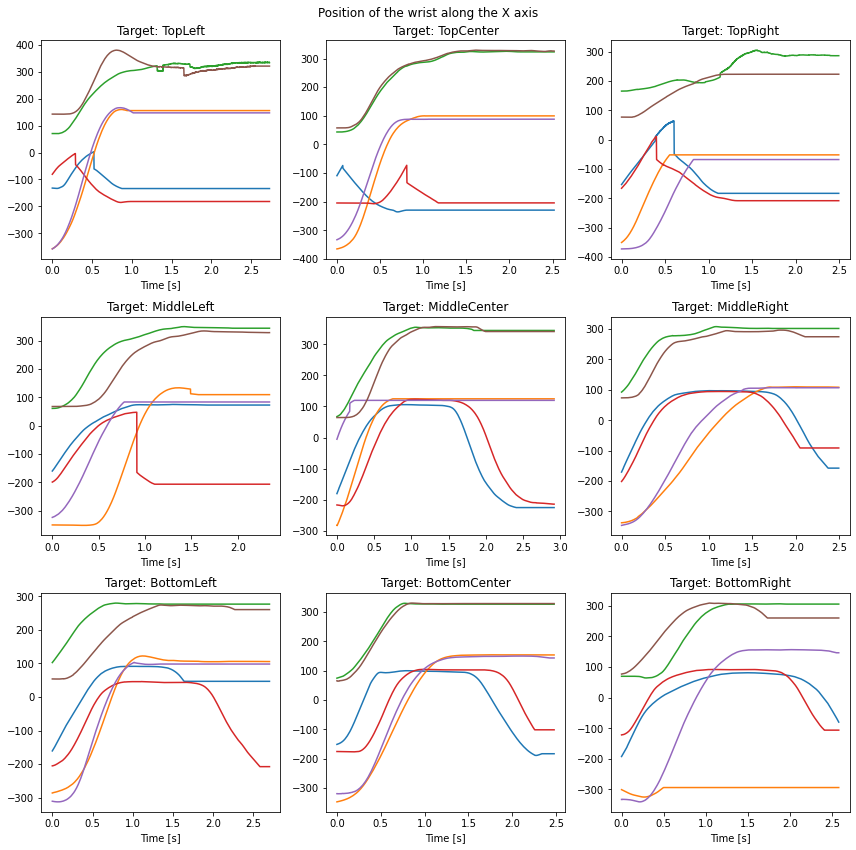

In [45]:
plot(17, 'Position of the wrist along the X axis')

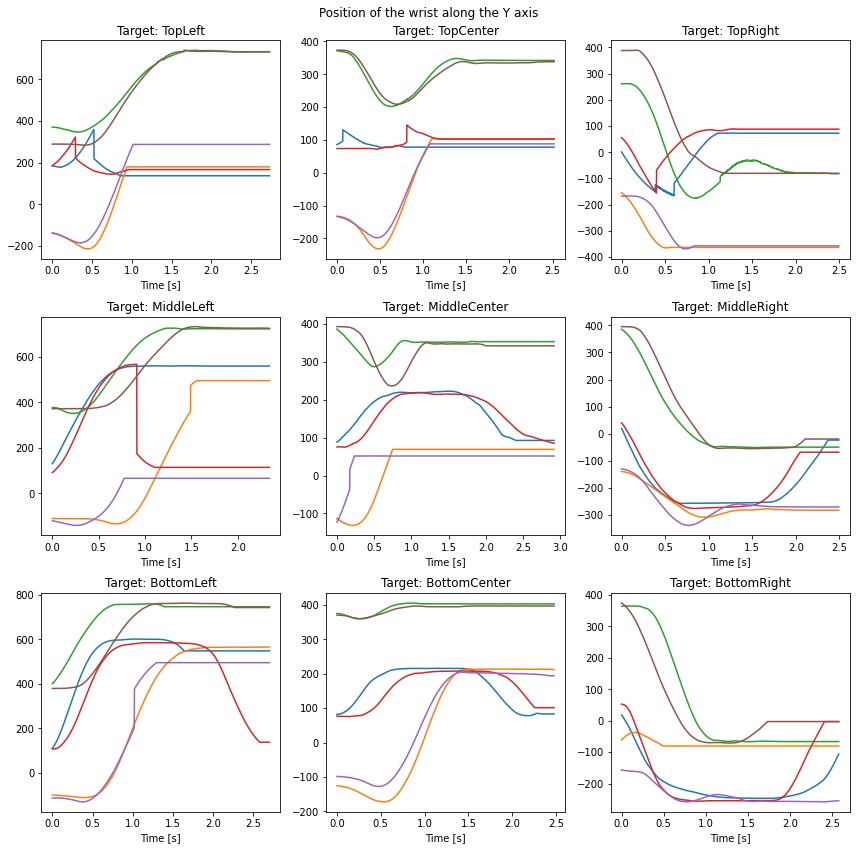

In [46]:
plot(18, 'Position of the wrist along the Y axis')

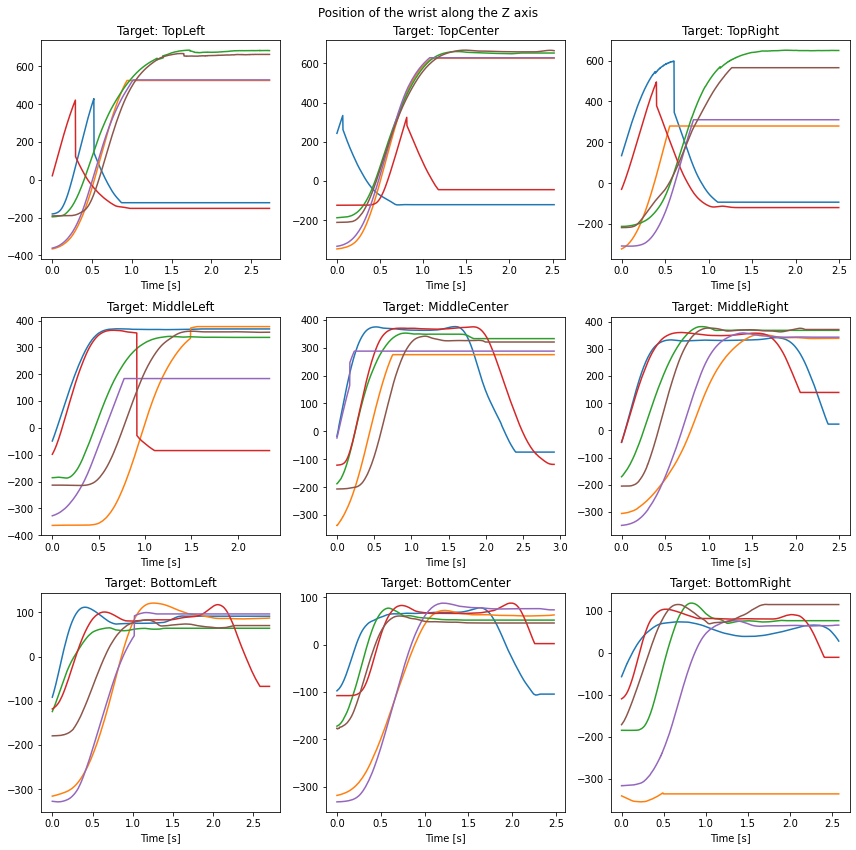

In [47]:
plot(19, 'Position of the wrist along the Z axis')